# SP22: Machine Learning for Signal Processing - Assignment 3

## Name : Akhila Sakiramolla (asakiram@iu.edu)
## UID : 2000886005

## Importing required libraries

In [3]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from numpy.linalg import eig
from numpy import linalg as LA
from scipy.fft import dct
from scipy.io import wavfile
import IPython.display as ipd
from numpy import linalg as la
import librosa as lb

# To execute a cell line by line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## P1: DCT and PCA 

Red channel shape : (1024, 768)
Blue channel shape : (1024, 768)
Blue channel shape : (1024, 768)


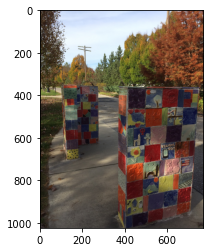

In [4]:
# Loading image data and extracting red channel

img = mpimg.imread(r'data/IMG_1878.JPG')
imgplot = plt.imshow(img)

# Extracting Red channel
Xr = img[...,0]
print("Red channel shape :",Xr.shape)

# Extracting Blue channel
Xb = img[...,1]
print("Blue channel shape :",Xb.shape)

# Extracting Green channel
Xg = img[...,2]
print("Blue channel shape :",Xg.shape)

In [5]:
# Number of blocks
# blocks = 3
cols = 768
R = np.zeros((8, 6912))

# Randomly choosing 3 blocks of 8 consecutive rows from 3 channels and concatenating them
for i in range(0, cols*3, cols):
  Xr_int = random.randint(0, Xr.shape[0]-8)
  R[0:8,i:i+768] = Xr[Xr_int:Xr_int+8]

for i in range(cols*3, cols*6, cols):
  Xb_int = random.randint(0, Xb.shape[0]-8)
  R[0:8, i:i+768] = Xb[Xb_int:Xb_int+8]

for i in range(cols*6, cols*9, cols):
  Xg_int = random.randint(0, Xg.shape[0]-8)
  R[0:8, i:i+768] = Xg[Xg_int:Xg_int+8]

print("Shape of the concatenated matrix R : ", R.shape)
print("Concatenated matrix R : ", R)

Shape of the concatenated matrix R :  (8, 6912)
Concatenated matrix R :  [[115.  83.  90. ...  82.  82.  75.]
 [160.  95.  57. ...  81.  72.  71.]
 [178.  90.  31. ...  70.  71.  73.]
 ...
 [114.  61.  44. ...  81.  75.  79.]
 [111.  44.  31. ...  77.  78.  74.]
 [ 28.  69.  41. ...  75.  75.  80.]]


In [6]:
# Calculating the mean matrix

R_mean = np.mean(R, axis = 1).reshape(-1,1)
print("Shape of mean matrix : ", R_mean.shape)

Shape of mean matrix :  (8, 1)


In [7]:
# Subtracting the mean vector

R_diff = R - R_mean
print("Shape of difference matrix : ", R_diff.shape)

Shape of difference matrix :  (8, 6912)


In [8]:
# Calculating the covariance matrix

R_cov = np.cov(R_diff)
print("Shape of Covariance matrix : ", R_cov.shape)

Shape of Covariance matrix :  (8, 8)


In [9]:
# Eigendecomposition on the covariance matrix

eigenvalues, W = LA.eigh(R_cov)
print("Shape of Eigen vector : ", W.shape)

# Calculating the transpose of Eigen vector
Wt = np.transpose(W)
print("Shape of Eigen vector : ", Wt.shape)

Shape of Eigen vector :  (8, 8)
Shape of Eigen vector :  (8, 8)


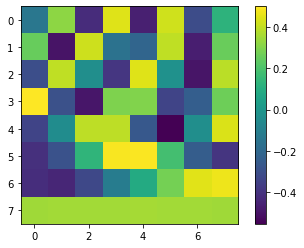

In [10]:
# Plotting the transpose of Eigen vector

plt.imshow(Wt)
plt.colorbar()
plt.show()

In [11]:
# Calculating the product of W⊤ and R

WtR = np.dot(Wt, R)
WtR.shape

(8, 6912)

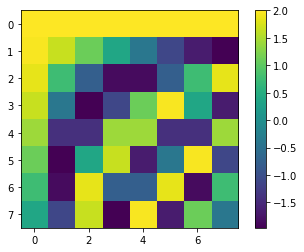

In [12]:
# Calculation of DCT matrix and plotting it

DCT_mat = dct(np.eye(8), axis=0)
plt.imshow(DCT_mat)
plt.colorbar()
plt.show()

In [13]:
# Number of blocks
cols = 768
R1 = np.zeros((8, 69120))

# Randomly choosing 30 blocks of 8 consecutive rows from 3 channels and concatenating them
for i in range(0, cols*30, cols):
  Xr_int = random.randint(0, Xr.shape[0]-8)
  R1[0:8,i:i+768] = Xr[Xr_int:Xr_int+8]

for i in range(cols*30, cols*60, cols):
  Xb_int = random.randint(0, Xb.shape[0]-8)
  R1[0:8, i:i+768] = Xb[Xb_int:Xb_int+8]

for i in range(cols*60, cols*90, cols):
  Xg_int = random.randint(0, Xg.shape[0]-8)
  R1[0:8, i:i+768] = Xg[Xg_int:Xg_int+8]

print("Shape of the concatenated matrix R : ", R1.shape)
print("Concatenated matrix R : ", R1)

Shape of the concatenated matrix R :  (8, 69120)
Concatenated matrix R :  [[60. 55. 40. ... 46. 49. 36.]
 [53. 38. 33. ... 27. 48. 24.]
 [50. 25. 25. ... 32. 37. 20.]
 ...
 [31. 29. 25. ... 59. 38. 54.]
 [30. 33. 35. ... 61. 40. 20.]
 [32. 27. 27. ... 53. 32. 10.]]


In [14]:
# Calculating the mean matrix

R_mean1 = np.mean(R1, axis = 1).reshape(-1,1)
print("Shape of mean matrix : ", R_mean1.shape)

Shape of mean matrix :  (8, 1)


In [15]:
# Subtracting the mean vector

R_diff1 = R1 - R_mean1
print("Shape of difference matrix : ", R_diff1.shape)

Shape of difference matrix :  (8, 69120)


In [16]:
# Calculating the covariance matrix

R_cov1 = np.cov(R_diff1)
print("Shape of Covariance matrix : ", R_cov1.shape)

Shape of Covariance matrix :  (8, 8)


In [17]:
# Eigendecomposition on the covariance matrix

eigenvalues1, W1 = LA.eigh(R_cov1)
print("Shape of Eigen vector : ", W1.shape)

# Calculating the transpose of Eigen vector
Wt1 = np.transpose(W1)
print("Shape of Eigen vector : ", Wt1.shape)

Shape of Eigen vector :  (8, 8)
Shape of Eigen vector :  (8, 8)


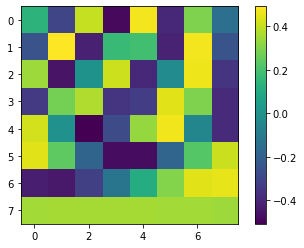

In [18]:
# Plotting the transpose of Eigen vector

plt.imshow(Wt1)
plt.colorbar()
plt.show()

Text(0.5, 1.0, 'Spectogram for 3 blocks')

Text(0.5, 1.0, 'Spectogram of DCT matrix')

Text(0.5, 1.0, 'Spectogram for 30 blocks')

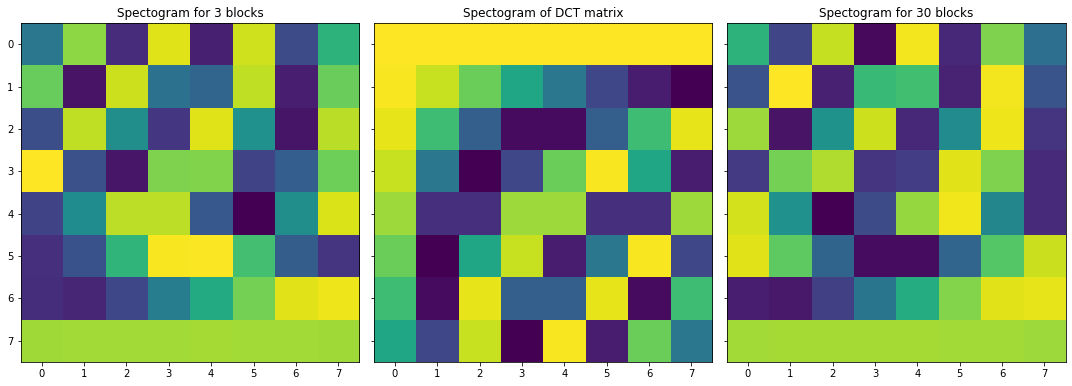

In [19]:
# Comparison of 3 plots
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True, figsize=(15,6))

axs[0].imshow(Wt)
axs[0].set_title('Spectogram for 3 blocks')
axs[1].imshow(DCT_mat)
axs[1].set_title('Spectogram of DCT matrix')
axs[2].imshow(Wt1)
axs[2].set_title('Spectogram for 30 blocks')

We observe that if we increase the number of iterations by more than 90, the spectogram of transpose of eigen vector may resemble the DCT matrix. For 30 blocks, the plot looks similar to that of the plot for 3 blocks.

## P2: Instantaneous Source Separation

In [24]:
# Loading audio file 

samplerate1, x_ica1 = wavfile.read(r'data/x_ica_1.wav')
print("Sample rate :",samplerate1)
print("Data shape :",x_ica1.shape)
ipd.Audio(r'data/x_ica_1.wav')

# Normalizing the data
x_ica1 = x_ica1/la.norm(x_ica1)

Sample rate : 16000
Data shape : (42292,)


In [26]:
# Loading audio file 

samplerate2, x_ica2 = wavfile.read(r'data/x_ica_2.wav')
print("Sample rate :",samplerate2)
print("Data shape :",x_ica2.shape)
ipd.Audio(r'data/x_ica_2.wav')

# Normalizing the data
x_ica2 = x_ica2/la.norm(x_ica2)

Sample rate : 16000
Data shape : (42292,)


In [27]:

# Loading audio file 

samplerate3, x_ica3 = wavfile.read(r'data/x_ica_3.wav')
print("Sample rate :",samplerate3)
print("Data shape :",x_ica3.shape)
ipd.Audio(r'data/x_ica_3.wav')

# Normalizing the data
x_ica3 = x_ica3/la.norm(x_ica3)

Sample rate : 16000
Data shape : (42292,)


In [28]:
# Loading audio file 

samplerate4, x_ica4 = wavfile.read(r'data/x_ica_4.wav')
print("Sample rate :",samplerate4)
print("Data shape :",x_ica4.shape)
ipd.Audio(r'data/x_ica_4.wav')

# Normalizing the data
x_ica4 = x_ica4/la.norm(x_ica4)

Sample rate : 16000
Data shape : (42292,)


In [29]:
# Stacking 4 audio files together

samplerate = 16000
x_ica = np.vstack((x_ica1,x_ica2,x_ica3,x_ica4)) 
print("Shape of the stacked matrix:",x_ica.shape)

Shape of the stacked matrix: (4, 42292)


In [30]:
# Calculating covariance matrix of stacked matrix

x_cov = np.cov(x_ica)
print("Shape of the covariance matrix:",x_cov.shape)
print("Covariance matrix:",x_cov)

Shape of the covariance matrix: (4, 4)
Covariance matrix: [[2.36454637e-05 2.36343089e-05 2.36447081e-05 2.22846234e-05]
 [2.36343089e-05 2.36454651e-05 2.36319120e-05 2.24884776e-05]
 [2.36447081e-05 2.36319120e-05 2.36454654e-05 2.22418490e-05]
 [2.22846234e-05 2.24884776e-05 2.22418490e-05 2.36454787e-05]]


In [33]:
# Calculating Eigen decomposition of stacked matrix

eigen_val, eigen_vec = eig(x_cov)
print("Eigen values : ", eigen_val)
print("Eigen vectors : ", eigen_vec)

Eigen values :  [9.26224397e-05 1.95658780e-06 2.71567164e-09 1.29577852e-10]
Eigen vectors :  [[ 0.5032853  -0.30629179 -0.59644618 -0.54510659]
 [ 0.50429267 -0.21309702  0.78922428 -0.27821503]
 [ 0.50304633 -0.32503568 -0.13068009  0.79007526]
 [ 0.48922101  0.86898032 -0.06557216  0.03516095]]


In [34]:
# Whitening the data

lam = np.power(np.diag(eigen_val),0.5)
inv_lam = np.linalg.inv(lam)
dot1 = np.dot(inv_lam,np.transpose(eigen_vec))
x_W = np.dot(dot1,x_ica)
print("Shape of the matrix after whitening :", x_W.shape)
print("Matrix after whitening:", x_W)

Shape of the matrix after whitening : (4, 42292)
Matrix after whitening: [[ 5.52646931e-01  8.47570930e-01  6.44767560e-01 ... -1.50348575e+00
  -1.63370463e+00 -1.68033062e+00]
 [-1.29517831e-01 -1.85854242e-01 -1.35850691e-01 ...  3.27492635e-01
   3.46352157e-01  3.66041371e-01]
 [ 1.50991471e-02  2.50913068e-02 -2.77115678e-04 ... -4.84195642e-02
  -4.64682111e-02 -6.44811038e-02]
 [ 3.99322145e-02  4.53621900e-04 -4.58952616e-02 ... -2.96847361e-02
  -1.63600837e-02 -9.09370493e-02]]


In [35]:
# Implementation of ICA

N, alpha, W_delta = 42292, 0.000001, 10000000
iden = np.identity(4) 
W = np.random.rand(4,4)
Y = np.dot(W, x_W)  

while np.sum(np.abs(W_delta)) > 0.000001:
    fY = np.power(Y,3) 
    gY = np.tanh(Y) 
    dot1 = np.dot(gY, np.transpose(fY))
    W_delta1 = np.multiply(N, iden) - dot1
    W_delta = np.dot(W_delta1, W) 
    W = W + alpha * W_delta 
    Y = np.dot(W, x_W)
X = np.dot(W,x_W) 
print("Shape of the matrix after unmixing :", X.shape)
print("Matrix after unmixing:", X)

Shape of the matrix after unmixing : (4, 42292)
Matrix after unmixing: [[ 1.73829867e-02  1.70366581e-02 -5.26823343e-03 ... -3.56757382e-02
  -3.10747426e-02 -5.32242645e-02]
 [ 5.10702574e-01  7.80732975e-01  5.92750531e-01 ... -1.38456991e+00
  -1.50265397e+00 -1.54755800e+00]
 [ 2.13629055e-02 -6.17333096e-03 -2.83398956e-02 ... -4.27755762e-03
   5.56585582e-03 -3.57798683e-02]
 [ 9.57199518e-03  1.26686070e-03 -1.51790708e-02 ... -1.42428245e-02
  -1.44410156e-02 -3.77700015e-02]]


In [36]:
# Recovered signals

for i in range(len(X)):
  print("Audio signal : ", i)
  ipd.Audio(X[i], rate = samplerate)

Audio signal :  0


Audio signal :  1


Audio signal :  2


Audio signal :  3


1. The first audio says "It's not easy to create illuminating examples"
2. The second audio is the bike noise 
3. The third audio says "22 or 23"
4. The fourth audio says "I ate every oyster on Nora's plate"

## P3: Ideal Masks

In [37]:
# Loading piano audio file 
piano, samplerate1 = lb.load(r'data/piano.wav', sr = None)
print("Sample rate :",samplerate1)
print("Data shape :",piano.shape)
ipd.Audio(r'data/piano.wav')

# Loading ocean audio file 
ocean, samplerate2 = lb.load(r'data/ocean.wav', sr = None)
print("Sample rate :",samplerate2)
print("Data shape :",ocean.shape)
ipd.Audio(r'data/ocean.wav')

Sample rate : 16000
Data shape : (80000,)


Sample rate : 16000
Data shape : (80000,)


Shape of STFT of piano data : (513, 157)
STFT of piano data : [[ 1.39605775e-01+0.0000000e+00j -2.35182449e-01+0.0000000e+00j
   3.82259563e-02+0.0000000e+00j ... -1.21416384e-03+0.0000000e+00j
  -1.34730653e-04+0.0000000e+00j -6.39152306e-04+0.0000000e+00j]
 [-2.86988378e-01+2.0463075e-02j -2.29732454e-01+4.8693252e-01j
  -5.45724809e-01+1.3137178e-01j ... -3.02032637e-03+2.2379946e-04j
  -1.44824956e-03+1.0638218e-03j -1.92784006e-04+9.3126099e-04j]
 [ 1.32133812e-01-2.6049033e-01j  6.30233586e-01-1.5756525e+00j
   1.38795614e+00+7.3574580e-02j ...  7.30993180e-03+5.7117739e-03j
   2.38357089e-03-2.7331510e-03j  1.62847200e-03+1.1654873e-04j]
 ...
 [-8.34124815e-03+1.7173551e-02j  3.42023908e-03+1.1348859e-03j
   2.45362241e-03+6.9336910e-03j ...  2.03304182e-04-2.7496647e-04j
  -2.77762796e-04+1.4999142e-04j -2.24132164e-04-9.1855109e-05j]
 [-2.32620887e-03-9.3086455e-03j  1.14760315e-03-3.3311549e-04j
  -1.46397064e-03-1.5961237e-03j ... -1.10912406e-04+2.5099862e-05j
   2.18339002

<Figure size 432x432 with 0 Axes>

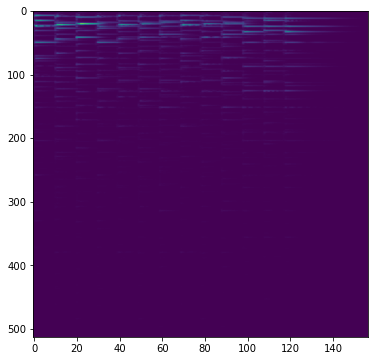

In [38]:
# Applying STFT with 1024 point frames and 50% overlap on piano audio and plotting it

piano_stft = lb.stft(piano, n_fft = 1024, hop_length = 512, window='hann',center=True, pad_mode='constant')
print("Shape of STFT of piano data :",piano_stft.shape)
print("STFT of piano data :", piano_stft)
S = abs(piano_stft)
plt.figure(figsize=(6,6))
plt.imshow(S,aspect="auto")
plt.show()

Shape of STFT of coean data : (513, 157)
STFT of ocean data : [[ 1.05433118e+00+0.j         -4.06864621e-02+0.j
  -2.85712272e-01+0.j         ... -1.10070638e-01+0.j
  -7.12497756e-02+0.j         -4.29980576e-01+0.j        ]
 [-9.43864763e-01+0.61263806j  2.06268206e-01+0.28660718j
   3.37482870e-01-0.47588697j ...  2.85930514e-01+0.09282405j
   4.33770657e-01-0.16583404j  4.56831902e-01-0.49602753j]
 [ 2.62511373e-01-1.2289046j   7.81018706e-03-0.56525624j
   6.61692545e-02+0.9694775j  ... -4.67538267e-01+0.21926296j
  -7.66276956e-01+0.3602359j  -3.95722836e-01+0.55212784j]
 ...
 [ 6.44254789e-04+0.01169197j -8.63609239e-02-0.0883925j
   1.12092290e-02+0.02966671j ... -1.88516325e-03+0.07636924j
   1.31022725e-02+0.06323655j  1.14666767e-01-0.20543961j]
 [ 1.45541029e-02-0.00301614j  3.14864479e-02+0.00592659j
  -4.85218409e-03+0.03190459j ... -3.65498587e-02+0.00299918j
  -9.70958825e-03-0.00785063j  4.57914174e-03+0.0984606j ]
 [-1.46838166e-02+0.j         -2.83704069e-03+0.j
   2.

<Figure size 432x432 with 0 Axes>

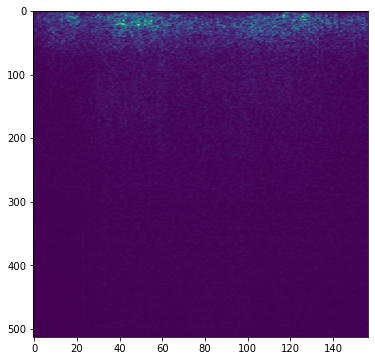

In [39]:
# Applying STFT with 1024 point frames and 50% overlap on ocean audio and plotting it

ocean_stft = lb.stft(ocean, n_fft = 1024, hop_length = 512, window='hann',center=True, pad_mode='constant')
print("Shape of STFT of coean data :",ocean_stft.shape)
print("STFT of ocean data :", ocean_stft)
N = abs(ocean_stft)
plt.figure(figsize=(6,6))
plt.imshow(N,aspect="auto")
plt.show()

Shape of X : (513, 157)


<Figure size 432x432 with 0 Axes>

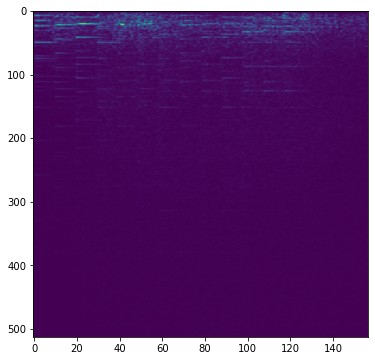

In [40]:
# Mixture spectogram by adding piano and ocean spectograms

X = piano_stft + ocean_stft
print("Shape of X :", X.shape)
plt.figure(figsize=(6,6))
plt.imshow(abs(X),aspect="auto")
plt.show()

In [41]:
# Audio of mixed signal

X_istft = lb.istft(abs(X))
ipd.Audio(X_istft, rate = samplerate1/2)

In [42]:
# Calculation of Mbar

mbar = np.power(S,2)/(np.power(S,2) + np.power(N,2))
print("Shape of mbar :", mbar.shape)

rec_piano_mbar1 = np.multiply(mbar, X)
rec_piano_mbar = lb.istft(rec_piano_mbar1, hop_length = 512,center=True)
print("Shape of recovered piano audio using MBAR :", rec_piano_mbar.shape)

Shape of mbar : (513, 157)
Shape of recovered piano audio using MBAR : (79872,)


In [43]:
# Audio of recovered piano signal using Mbar
ipd.Audio(rec_piano_mbar.real, rate = samplerate1)

<Figure size 432x432 with 0 Axes>

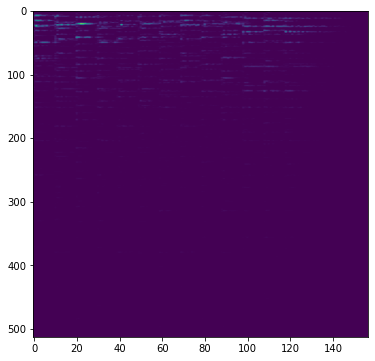

In [44]:
# Spectogram of recovered piano signal using Mbar

plt.figure(figsize=(6,6))
plt.imshow(abs(rec_piano_mbar1.real),aspect="auto")
plt.show()

In [45]:
piano = abs(piano[0:79872].real)
piano.shape

(79872,)

In [46]:
# SNR value for recovered piano signal using Mbar

SNR_mbar = 10*np.log10((np.sum(np.square(abs(piano))))/(np.sum(np.square(abs(piano) - abs(rec_piano_mbar.real)))))
print("The SNR value for recovered piano signal using Mbar : ", round(SNR_mbar,2))

The SNR value for recovered piano signal using Mbar :  8.95


In [47]:
# Calculation of Ideal Binary Masks (IBM)

ibm_mix = np.ones((ocean_stft.shape))
for i in range(ocean_stft.shape[0]):
  for j in range(ocean_stft.shape[1]):
    if abs(piano_stft[i, j]) > abs(ocean_stft[i, j]):
      ibm_mix[i, j] = 1
    else:
      ibm_mix[i, j] = 0

print("Shape of the IBM mix matrix:", ibm_mix.shape)

Shape of the IBM mix matrix: (513, 157)


In [48]:
# Recovering piano signal using IBM

rec_piano_ibm1 = np.multiply(ibm_mix, X)
rec_piano_ibm = lb.istft(rec_piano_ibm1, hop_length = 512,center=True)
print("Shape of recovered piano audio using IBM:", rec_piano_ibm.shape)

Shape of recovered piano audio using IBM: (79872,)


In [49]:
# Audio of recovered piano signal using IBM

ipd.Audio(rec_piano_ibm.real, rate = samplerate1)

<Figure size 432x432 with 0 Axes>

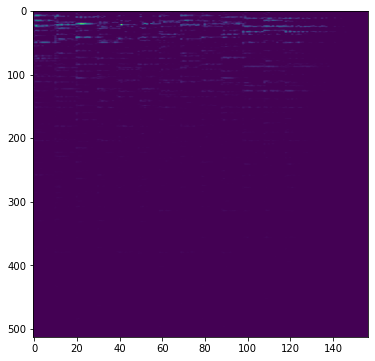

In [50]:
# Spectogram of recovered piano signal using IBM

plt.figure(figsize=(6,6))
plt.imshow(abs(rec_piano_ibm1.real),aspect="auto")
plt.show()

In [51]:
# SNR value for recovered piano signal using IBM

SNR_ibm = 10*np.log10((np.sum(np.square(abs(piano))))/(np.sum(np.square(abs(piano) - abs(rec_piano_ibm.real)))))
print("The SNR value for recovered piano signal using IBM : ", round(SNR_ibm, 2))

The SNR value for recovered piano signal using IBM :  8.36
